In [1]:
import os
import cv2
import numpy as np
import pickle
import random


#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [2]:

DIRECTORY = r'/Users/dammy/Downloads/animals'
CATEGORIES = ['dog', 'cat']


In [3]:
IMG_SIZE = 100

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path =os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [4]:
len(data)

25000

In [5]:
random.shuffle(data)

In [6]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [7]:
X = np.array(X)


In [9]:
y = np.array(y)


array([1, 0, 0, ..., 0, 0, 0])

In [10]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [11]:
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [12]:
X = X/255

In [13]:
X.shape

(25000, 100, 100, 3)

In [14]:

import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
model.fit(X, y, epochs = 5,  batch_size = 64, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples


2022-10-31 23:21:02.208264: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 23:21:02.210185: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/5
20000/20000 [==============================] - 388s 19ms/sample - loss: 0.6642 - acc: 0.5781 - val_loss: 0.6200 - val_acc: 0.6644
Epoch 2/5
20000/20000 [==============================] - 323s 16ms/sample - loss: 0.5339 - acc: 0.7278 - val_loss: 0.4452 - val_acc: 0.7860
Epoch 3/5
20000/20000 [==============================] - 292s 15ms/sample - loss: 0.4115 - acc: 0.8106 - val_loss: 0.3605 - val_acc: 0.8362
Epoch 4/5
20000/20000 [==============================] - 277s 14ms/sample - loss: 0.3288 - acc: 0.8568 - val_loss: 0.3261 - val_acc: 0.8564
Epoch 5/5
20000/20000 [==============================] - 297s 15ms/sample - loss: 0.2722 - acc: 0.8817 - val_loss: 0.3058 - val_acc: 0.8718


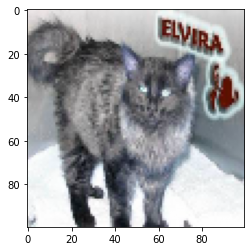

In [17]:
idx = random.randint(0, len(X))
plt.imshow(X[idx, :])
plt.show()


In [18]:
TEST_DIRECTORY = r'/Users/dammy/Downloads/tests'
TEST_CATEGORIES = ['dog', 'cat']

In [19]:
print(label)

1


In [20]:
IMG_SIZE = 100

test_data = []

for category in TEST_CATEGORIES:
    folder = os.path.join(TEST_DIRECTORY, category)
    label = TEST_CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path =os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        test_data.append([img_arr, label])

In [21]:
len(test_data)

126

In [22]:
random.shuffle(test_data)

In [23]:
X_test = []
y_test = []

for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [24]:
X_test= np.array(X_test)
y_test = np.array(y_test)
pickle.dump(X_test, open('X_test.pkl', 'wb'))
pickle.dump(y_test, open('y_test.pkl', 'wb'))
X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))


In [25]:
X_test = X_test/255

In [29]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_test)

# le.fit_transform(y_test)

le.classes_
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1}


In [30]:
list(le.inverse_transform([i for i in range(len(le.classes_))]))

[0, 1]

In [31]:
X_test.shape

(126, 100, 100, 3)

In [32]:
model.evaluate(X_test, y_test)

126/126 [==============================] - 1s 7ms/sample - loss: 0.2409 - acc: 0.8810


[0.24089798142039587, 0.88095236]

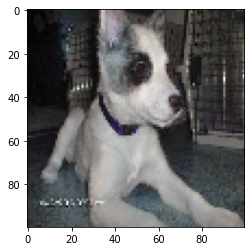

[[0.08480337]]
Our model says it is a : dog


In [54]:

idx2 = random.randint(4, len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)